
# ***1.)DATA ACQUISITION***

In [2]:
import os

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
trade_df=pd.read_csv('/content/drive/MyDrive/ds_<Aniket Katiyar>/csv/historical_data.csv')

In [6]:
market_df=pd.read_csv('/content/drive/MyDrive/ds_<Aniket Katiyar>/csv/fear_greed_index.csv')

In [7]:
market_df.head(15)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [8]:
trade_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
market_df.classification.unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [10]:
market_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [11]:
market_df["date"].dtype

dtype('O')

In [12]:
market_df["timestamp"].dtype

dtype('int64')

In [13]:
trade_df["Timestamp IST"].dtype

dtype('O')

In [14]:
trade_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


# ***2.)DATA CLEANING***

In [15]:
market_df['date'] = market_df['date'].replace('########', np.nan)

In [16]:
market_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [17]:
market_df['date'] = pd.to_datetime(market_df['date'], errors='coerce')

In [18]:

market_df["date"].isna().sum()

np.int64(0)

In [19]:
market_df.head(15)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [20]:
market_df.shape

(2644, 4)

In [21]:
trade_df.shape

(211224, 16)

In [22]:
trade_df.Side.unique()

array(['BUY', 'SELL'], dtype=object)

In [23]:
trade_df.Coin.unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [24]:
trade_df.Coin.value_counts().head(15)

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691
FARTCOIN,4650
MELANIA,4428
PURR/USDC,2774
WLD,1983


In [25]:
dup_mask = trade_df.duplicated(subset=['Account', 'Timestamp IST', 'Coin'], keep=False)

In [26]:
dup_mask

,0
0,True
1,True
2,True
3,True
4,True
...,...
211219,True
211220,True
211221,True
211222,True


In [27]:
trade_df['Timestamp IST'] = pd.to_datetime(trade_df['Timestamp IST'], errors='coerce')
trade_df['date_only'] = trade_df['Timestamp IST'].dt.date

# ***3.)OUTLIER DETETION AND REMOVAL***

In [28]:
import datetime
today = datetime.date.today()
future_mask = trade_df['date_only'] > today
print("Future date rows count:", future_mask.sum())
print(trade_df[future_mask].head())

old_mask = trade_df['date_only'] < datetime.date(2000,1,1)
print("Very old date rows count:", old_mask.sum())
print(trade_df[old_mask].head())

Future date rows count: 12092
                                        Account   Coin  Execution Price  \
220  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX         0.552720   
221  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX         0.552950   
222  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX         0.552950   
223  0xae5eacaf9c6b9111fd53034a602c192a04e082ed   DYDX         0.552980   
327  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  AIXBT         0.082647   

     Size Tokens  Size USD Side       Timestamp IST  Start Position  \
220       4070.7   2249.96  BUY 2025-11-03 13:34:00        300000.0   
221       4069.0   2249.95  BUY 2025-11-03 13:34:00        304070.7   
222       3670.9   2029.82  BUY 2025-11-03 13:34:00        308139.7   
223      38189.4  21117.97  BUY 2025-11-03 13:34:00        311810.6   
327        300.0     24.79  BUY 2025-12-04 15:51:00             0.0   

     Direction  Closed PnL                                   Transaction Hash  \
220  Open L

In [29]:
trade_df[future_mask]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only
220,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.552720,4070.70000,2249.96,BUY,2025-11-03 13:34:00,300000.00000,Open Long,0.0,0x68d7fed49560cb1e2764041f54302101bc009a22fff7...,78982420617,True,0.755985,9.510000e+14,1.740000e+12,2025-11-03
221,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.552950,4069.00000,2249.95,BUY,2025-11-03 13:34:00,304070.70000,Open Long,0.0,0x68d7fed49560cb1e2764041f54302101bc009a22fff7...,78982420617,True,0.755983,4.480000e+14,1.740000e+12,2025-11-03
222,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.552950,3670.90000,2029.82,BUY,2025-11-03 13:34:00,308139.70000,Open Long,0.0,0x68d7fed49560cb1e2764041f54302101bc009a22fff7...,78982420617,True,0.682020,3.920000e+12,1.740000e+12,2025-11-03
223,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,DYDX,0.552980,38189.40000,21117.97,BUY,2025-11-03 13:34:00,311810.60000,Open Long,0.0,0x68d7fed49560cb1e2764041f54302101bc009a22fff7...,78982420617,True,7.095639,9.400000e+14,1.740000e+12,2025-11-03
327,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AIXBT,0.082647,300.00000,24.79,BUY,2025-12-04 15:51:00,0.00000,Open Long,0.0,0xb1294e924280e1830b50042165333f014a0013b273ab...,85999083534,True,0.008329,1.040000e+15,1.740000e+12,2025-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205521,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,84953.000000,0.09634,8184.37,BUY,2025-12-04 20:46:00,29.12035,Open Long,0.0,0x9518485d29c0ff0f840c04216890890201ee001a02b6...,86048399742,True,2.455311,9.420000e+14,1.740000e+12,2025-12-04
205522,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,84953.000000,0.78598,66771.36,BUY,2025-12-04 20:46:00,29.21669,Open Long,0.0,0x9518485d29c0ff0f840c04216890890201ee001a02b6...,86048399742,True,20.031407,6.200000e+14,1.740000e+12,2025-12-04
210647,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,115.650000,0.18000,20.82,SELL,2025-11-04 09:39:00,-908.00000,Open Short,0.0,0x00000000000000000000000000000000000000000000...,85745091696,False,0.002081,4.250000e+14,1.740000e+12,2025-11-04
210648,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,115.650000,138.33000,15997.86,SELL,2025-11-04 09:39:00,-908.18000,Open Short,0.0,0x32022dae3d0b9eecbdc2042150bfc60209970016fc3d...,85745091696,False,1.599786,3.270000e+14,1.740000e+12,2025-11-04


In [30]:
mean=trade_df["Closed PnL"].mean()
std=trade_df["Closed PnL"].std()
trade_df["Z_score"]=(trade_df["Closed PnL"]-mean)/std

In [31]:
trade_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,Z_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,-0.053036
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,-0.053036
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,-0.053036
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,-0.053036
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,-0.053036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,NaT,-0.075074
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,NaT,-0.175514
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,NaT,-0.077450
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,NaT,-0.260604


In [32]:
trade_df = trade_df[(trade_df["Z_score"] <= 3) & (trade_df["Z_score"] >= -3)]


In [33]:
trade_df.shape

(210370, 18)

In [34]:


mean=trade_df["Size USD"].mean()
std=trade_df["Size USD"].std()
trade_df["Z_score"]=(trade_df["Size USD"]-mean)/std

/tmp/ipython-input-2976390684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_df["Z_score"]=(trade_df["Size USD"]-mean)/std


In [35]:
trade_df = trade_df[(trade_df["Z_score"] <= 3) & (trade_df["Z_score"] >= -3)]

In [36]:
trade_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,Z_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,0.091342
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,-0.170852
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,-0.136219
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,-0.136510
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,-0.172813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,NaT,-0.160928
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,NaT,-0.095999
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,NaT,-0.159392
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,NaT,-0.040992


In [37]:
trade_df.shape

(208602, 18)

# ***# 4.)FEATURE ENGINEERING AND  DATA VISUALIZATION***

In [38]:
trade_df=trade_df.drop(['Transaction Hash', 'Order ID','Trade ID','Timestamp','Z_score'],axis='columns')

In [39]:
trade_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date_only
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,True,0.345404,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,True,0.005600,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,True,0.050431,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,True,0.050043,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,True,0.003055,2024-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,False,0.042080,NaT
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,False,0.233863,NaT
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,False,0.046616,NaT
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,False,0.396337,NaT


In [40]:
market_df['date'] = pd.to_datetime(market_df['date'])

trade_df['date_only'] = pd.to_datetime(trade_df['date_only'])

In [41]:
merged_df=trade_df.merge(market_df[["date","classification"]],left_on='date_only',right_on='date',how='left')

In [42]:
market_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [43]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date_only,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,True,0.345404,2024-02-12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,True,0.005600,2024-02-12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,True,0.050431,2024-02-12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,True,0.050043,2024-02-12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,True,0.003055,2024-02-12,2024-02-12,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208597,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,False,0.042080,NaT,NaT,NaN
208598,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,False,0.233863,NaT,NaT,NaN
208599,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,False,0.046616,NaT,NaT,NaN
208600,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,False,0.396337,NaT,NaT,NaN


# ***A)MARKET SENTIMENT VS PROFITABILITY***

In [44]:
merged_df["profit"]=merged_df["Closed PnL"].apply(lambda x: 1 if x>0 else 0)

In [45]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date_only,date,classification,profit
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,True,0.345404,2024-02-12,2024-02-12,Greed,0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,True,0.005600,2024-02-12,2024-02-12,Greed,0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,True,0.050431,2024-02-12,2024-02-12,Greed,0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,True,0.050043,2024-02-12,2024-02-12,Greed,0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,True,0.003055,2024-02-12,2024-02-12,Greed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208597,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,False,0.042080,NaT,NaT,NaN,0
208598,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,False,0.233863,NaT,NaT,NaN,0
208599,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,False,0.046616,NaT,NaT,NaN,0
208600,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,False,0.396337,NaT,NaT,NaN,0


In [46]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Crossed',
       'Fee', 'date_only', 'date', 'classification', 'profit'],
      dtype='object')

In [47]:
profitability = merged_df.groupby('classification').agg(
    total_trades       = ('Closed PnL', 'count'),
    profitable_trades  = ('profit', 'sum'),
    win_rate           = ('profit', lambda x: x.sum()/x.count()),
    avg_closedPnL      = ('Closed PnL', 'mean'),
    median_closedPnL   = ('Closed PnL', 'median'),
    total_closedPnL    = ('Closed PnL', 'sum')
).reset_index()

In [48]:
profitability

,classification,total_trades,profitable_trades,win_rate,avg_closedPnL,median_closedPnL,total_closedPnL
0,Extreme Fear,2312,678,0.293253,0.837128,0.00000,1935.438824
1,Extreme Greed,5537,3036,0.548311,68.535944,0.84588,379483.524466
2,Fear,13623,5122,0.375982,47.929380,0.00000,652941.939910
3,Greed,11160,4831,0.432885,32.085777,0.00000,358077.266493
4,Neutral,2750,1361,0.494909,24.444701,0.00000,67222.926766


In [49]:
profitability["win_rate"]=profitability["win_rate"].apply(lambda x: x*100)

In [50]:
from matplotlib import pyplot as plt

In [51]:
%matplotlib inline

In [52]:
import seaborn as sns

/tmp/ipython-input-3737633200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profitability, x='classification', y='win_rate',palette='Set2')


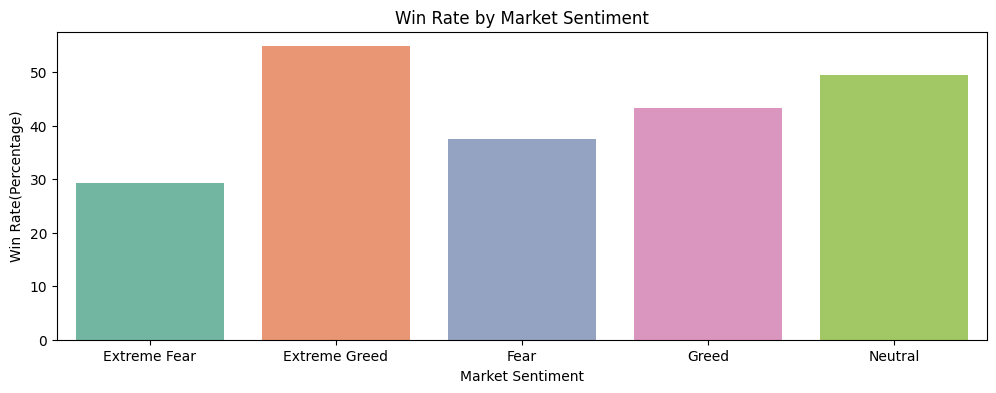

In [53]:
plt.figure(figsize=(12,4))
sns.barplot(data=profitability, x='classification', y='win_rate',palette='Set2')
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate(Percentage)')
plt.xlabel('Market Sentiment')
plt.show()

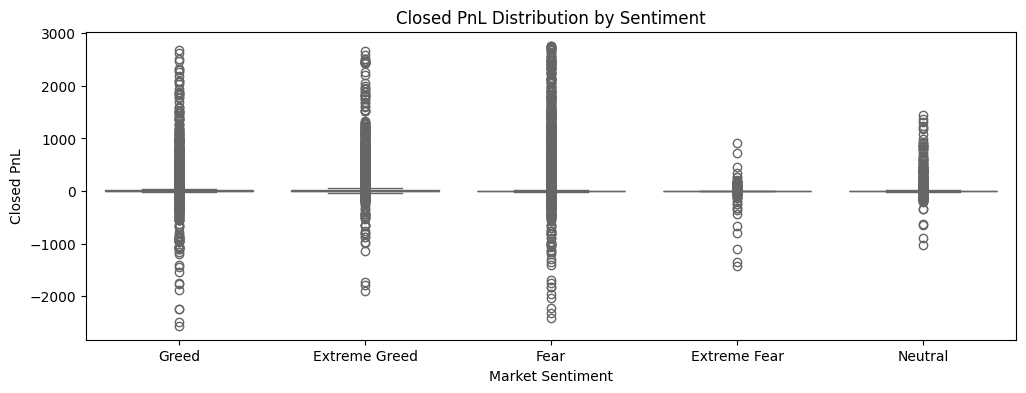

In [54]:
plt.figure(figsize=(12,4))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL',hue='classification',palette="Set3",
    legend=False  )
plt.title('Closed PnL Distribution by Sentiment')
plt.ylabel('Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()

/tmp/ipython-input-4273998472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profitability, x='classification', y='avg_closedPnL',palette="Set1")


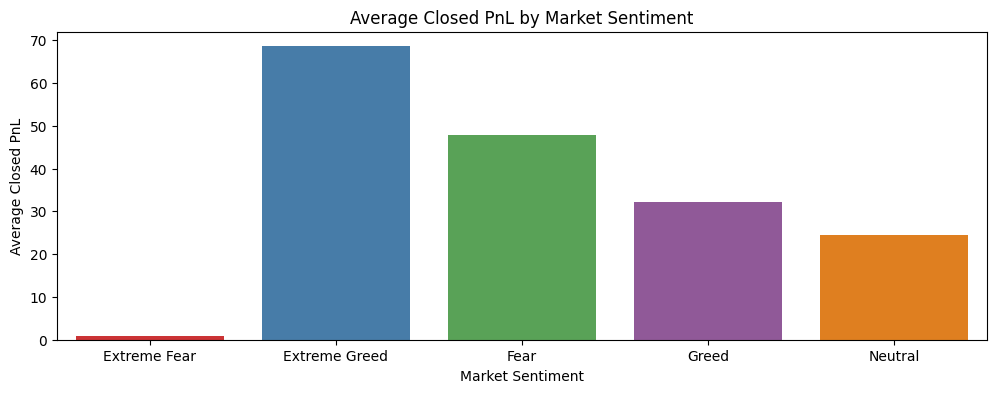

In [55]:
plt.figure(figsize=(12,4))
sns.barplot(data=profitability, x='classification', y='avg_closedPnL',palette="Set1")
plt.title('Average Closed PnL by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.show()

In [56]:
merged_df['day_of_week'] = pd.to_datetime(merged_df['date_only']).dt.day_name()


In [57]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date_only,date,classification,profit,day_of_week
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,True,0.345404,2024-02-12,2024-02-12,Greed,0,Monday
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,True,0.005600,2024-02-12,2024-02-12,Greed,0,Monday
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,True,0.050431,2024-02-12,2024-02-12,Greed,0,Monday
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,True,0.050043,2024-02-12,2024-02-12,Greed,0,Monday
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,True,0.003055,2024-02-12,2024-02-12,Greed,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208597,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,False,0.042080,NaT,NaT,NaN,0,NaN
208598,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,False,0.233863,NaT,NaT,NaN,0,NaN
208599,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,False,0.046616,NaT,NaT,NaN,0,NaN
208600,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,False,0.396337,NaT,NaT,NaN,0,NaN


# ***B)TRADE SIZE VS MARKET SENTIMENT***

In [58]:
merged_df['volume'] = 'Medium'
merged_df['volume']=merged_df["Size USD"].apply(lambda x: 'Large' if x>10000 else ('Small' if x<1000 else 'Medium'))

In [59]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date_only,date,classification,profit,day_of_week,volume
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,True,0.345404,2024-02-12,2024-02-12,Greed,0,Monday,Medium
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,True,0.005600,2024-02-12,2024-02-12,Greed,0,Monday,Small
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,True,0.050431,2024-02-12,2024-02-12,Greed,0,Monday,Medium
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,True,0.050043,2024-02-12,2024-02-12,Greed,0,Monday,Medium
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,True,0.003055,2024-02-12,2024-02-12,Greed,0,Monday,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208597,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,False,0.042080,NaT,NaT,NaN,0,NaN,Small
208598,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,False,0.233863,NaT,NaT,NaN,0,NaN,Medium
208599,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,False,0.046616,NaT,NaT,NaN,0,NaN,Small
208600,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,False,0.396337,NaT,NaT,NaN,0,NaN,Medium


In [60]:

summary = merged_df.groupby('classification').agg(
    total_trades       = ('Size USD', 'count'),
    avg_size_usd       = ('Size USD', 'mean'),
    median_size_usd    = ('Size USD', 'median'),
    sum_size_usd       = ('Size USD', 'sum')
).reset_index()

In [61]:
summary

,classification,total_trades,avg_size_usd,median_size_usd,sum_size_usd
0,Extreme Fear,2312,3158.051683,590.295,7301415.49
1,Extreme Greed,5537,2898.720544,349.810,16050215.65
2,Fear,13623,3681.278326,662.780,50150054.63
3,Greed,11160,3697.977608,642.430,41269430.11
4,Neutral,2750,4112.990669,410.945,11310724.34


/tmp/ipython-input-1547876357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='classification', y='avg_size_usd',palette="Set3")


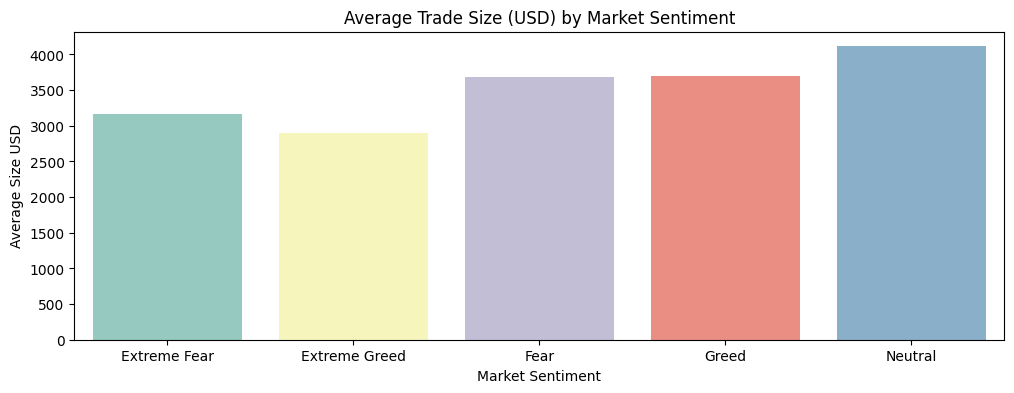

In [62]:
plt.figure(figsize=(12,4))
sns.barplot(data=summary, x='classification', y='avg_size_usd',palette="Set3")
plt.title('Average Trade Size (USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Size USD')
plt.show()

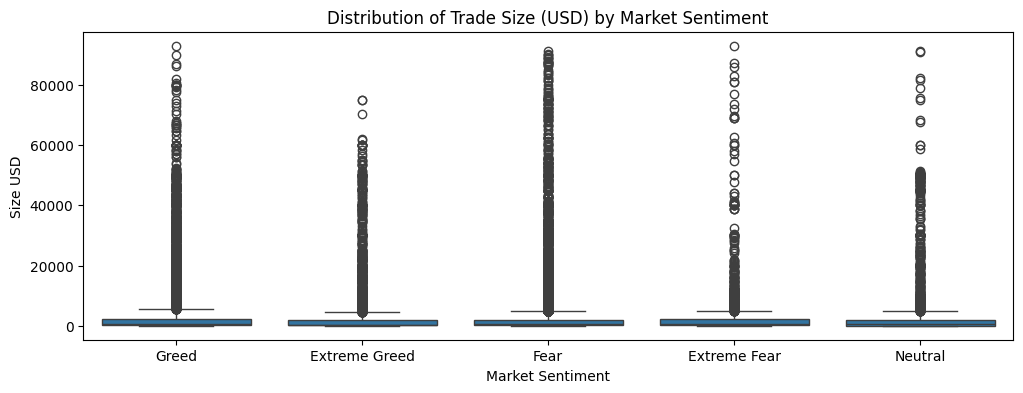

In [63]:
plt.figure(figsize=(12,4))
sns.boxplot(data=merged_df, x='classification', y='Size USD')
plt.title('Distribution of Trade Size (USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Size USD')
plt.show()


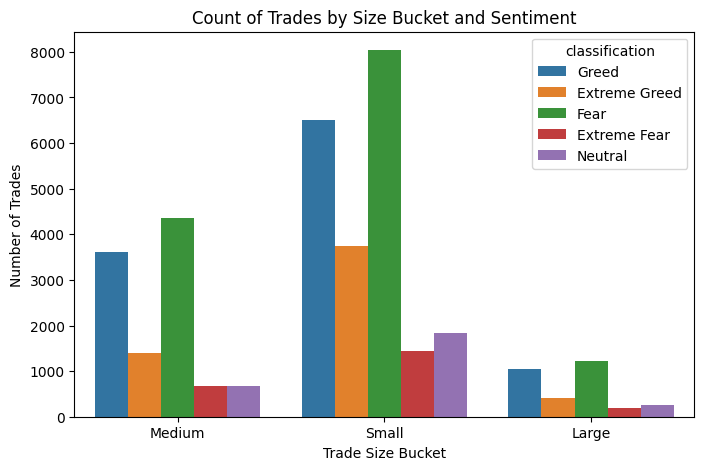

In [64]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='volume',hue="classification")
plt.title('Count of Trades by Size Bucket and Sentiment')
plt.xlabel('Trade Size Bucket')
plt.ylabel('Number of Trades')
plt.show()

# ***C)RISK VS SENTIMENT***

In [65]:
merged_df["RISK"]=merged_df["Size USD"]**2

In [66]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date_only,date,classification,profit,day_of_week,volume,RISK
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,True,0.345404,2024-02-12,2024-02-12,Greed,0,Monday,Medium,6.197090e+07
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,True,0.005600,2024-02-12,2024-02-12,Greed,0,Monday,Small,1.630218e+04
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,True,0.050431,2024-02-12,2024-02-12,Greed,0,Monday,Medium,1.323949e+06
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,True,0.050043,2024-02-12,2024-02-12,Greed,0,Monday,Medium,1.304255e+06
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,True,0.003055,2024-02-12,2024-02-12,Greed,0,Monday,Small,4.865062e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208597,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,False,0.042080,NaT,NaT,NaN,0,NaN,Small,1.770726e+05
208598,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,False,0.233863,NaT,NaT,NaN,0,NaN,Medium,5.469190e+06
208599,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,False,0.046616,NaT,NaT,NaN,0,NaN,Small,2.173051e+05
208600,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,False,0.396337,NaT,NaT,NaN,0,NaN,Medium,1.570838e+07


In [67]:
RISK_EXPOSURE = merged_df.groupby('classification').agg(
    total_trades       = ('RISK', 'count'),
    avg_risk = ('RISK', 'mean'),
    median_risk = ('RISK', 'median'),
    sum_risk = ('RISK', 'sum')
).reset_index()

In [68]:
RISK_EXPOSURE

,classification,total_trades,avg_risk,median_risk,sum_risk
0,Extreme Fear,2312,8.193180e+07,348448.36765,1.894263e+11
1,Extreme Greed,5537,6.828574e+07,122367.03610,3.780981e+11
2,Fear,13623,1.060220e+08,439277.32840,1.444337e+12
3,Greed,11160,9.366266e+07,412717.26530,1.045275e+12
4,Neutral,2750,1.357551e+08,168875.79725,3.733264e+11


/tmp/ipython-input-510849305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=RISK_EXPOSURE, x='classification', y='avg_risk',palette="Set1")


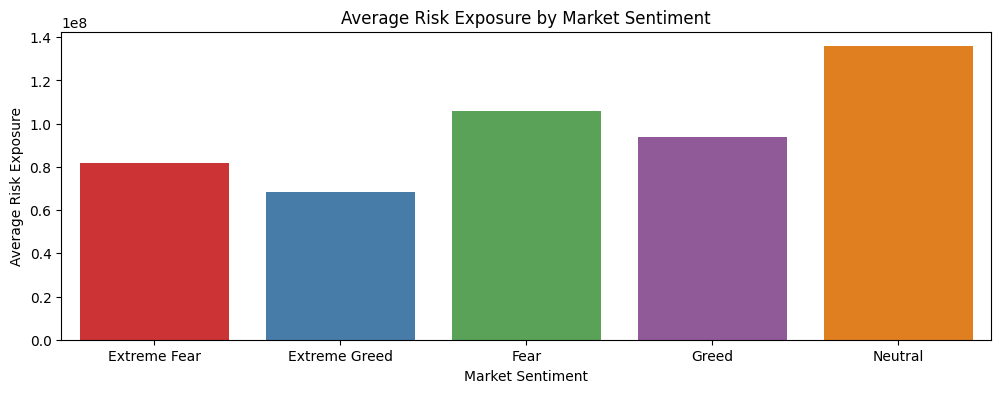

In [69]:
plt.figure(figsize=(12,4))
sns.barplot(data=RISK_EXPOSURE, x='classification', y='avg_risk',palette="Set1")
plt.title('Average Risk Exposure by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Risk Exposure')
plt.show()

In [70]:
merged_df['risk_box']=merged_df["RISK"].apply(lambda x: 'High_Risk' if x>1e8 else ('Small_Risk' if x<1e6 else 'Medium_Risk'))

In [71]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,date_only,date,classification,profit,day_of_week,volume,RISK,risk_box
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0000,True,0.345404,2024-02-12,2024-02-12,Greed,0,Monday,Medium,6.197090e+07,Medium_Risk
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0000,True,0.005600,2024-02-12,2024-02-12,Greed,0,Monday,Small,1.630218e+04,Small_Risk
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0000,True,0.050431,2024-02-12,2024-02-12,Greed,0,Monday,Medium,1.323949e+06,Medium_Risk
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0000,True,0.050043,2024-02-12,2024-02-12,Greed,0,Monday,Medium,1.304255e+06,Medium_Risk
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0000,True,0.003055,2024-02-12,2024-02-12,Greed,0,Monday,Small,4.865062e+03,Small_Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208597,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,NaT,7546.600000,Close Long,-20.2566,False,0.042080,NaT,NaT,NaN,0,NaN,Small,1.770726e+05,Small_Risk
208598,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,NaT,7164.400000,Close Long,-112.5773,False,0.233863,NaT,NaT,NaN,0,NaN,Medium,5.469190e+06,Medium_Risk
208599,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,NaT,5040.300000,Close Long,-22.4402,False,0.046616,NaT,NaT,NaN,0,NaN,Small,2.173051e+05,Small_Risk
208600,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,NaT,4616.900000,Close Long,-190.7894,False,0.396337,NaT,NaT,NaN,0,NaN,Medium,1.570838e+07,Medium_Risk


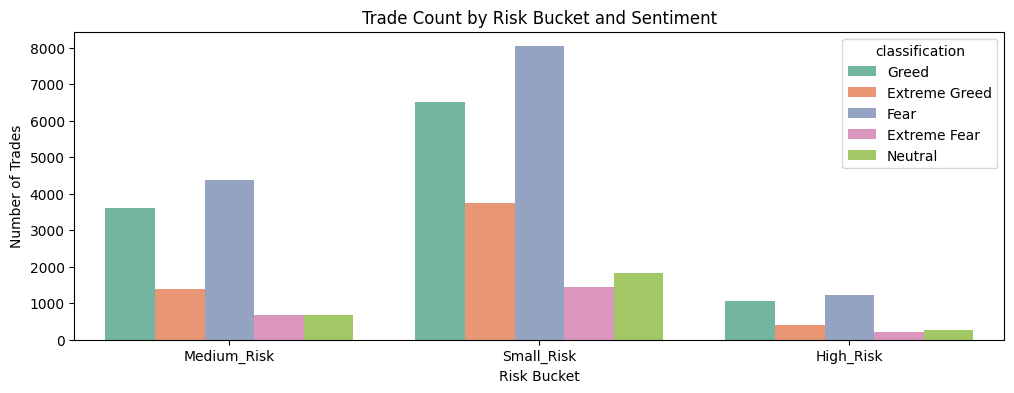

In [72]:
plt.figure(figsize=(12,4))
sns.countplot(data=merged_df, x='risk_box', hue='classification',palette="Set2")
plt.title('Trade Count by Risk Bucket and Sentiment')
plt.xlabel('Risk Bucket')
plt.ylabel('Number of Trades')
plt.show()

# ***D)BUY VS SELL BY SENTIMENT***

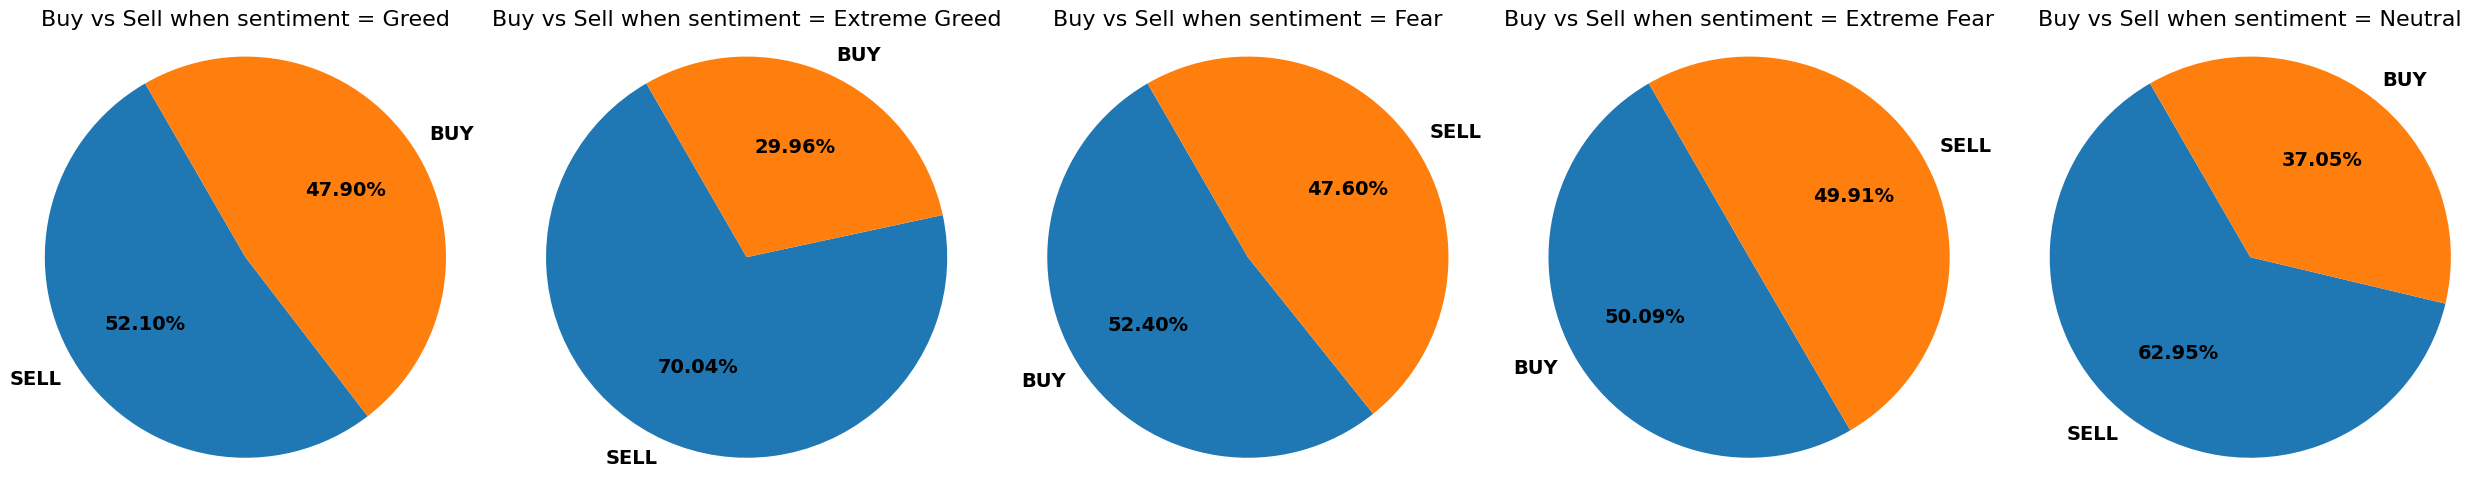

In [73]:

sentiments = merged_df['classification'].dropna().unique()
plt.figure(figsize=(25,5))

for i, c in enumerate(sentiments):
    data = merged_df[merged_df['classification'] == c]['Side'].value_counts()
    plt.subplot(1, len(sentiments), i+1)
    plt.pie(data.values,labels = data.index,autopct = '%0.2f%%',startangle = 120,textprops={'fontsize': 14, 'fontweight': 'bold'} )
    plt.title(f'Buy vs Sell when sentiment = {c}',fontsize=16)
    plt.axis('equal')

plt.tight_layout()
plt.show()

In [74]:
data

,count
Side,
SELL,1731
BUY,1019


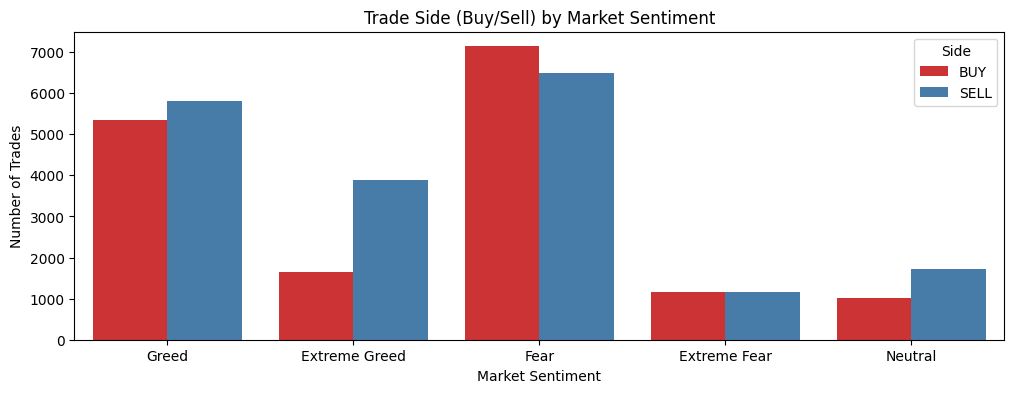

In [75]:
plt.figure(figsize=(12,4))
sns.countplot(data=merged_df, x='classification', hue='Side',palette="Set1")
plt.title('Trade Side (Buy/Sell) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.show()

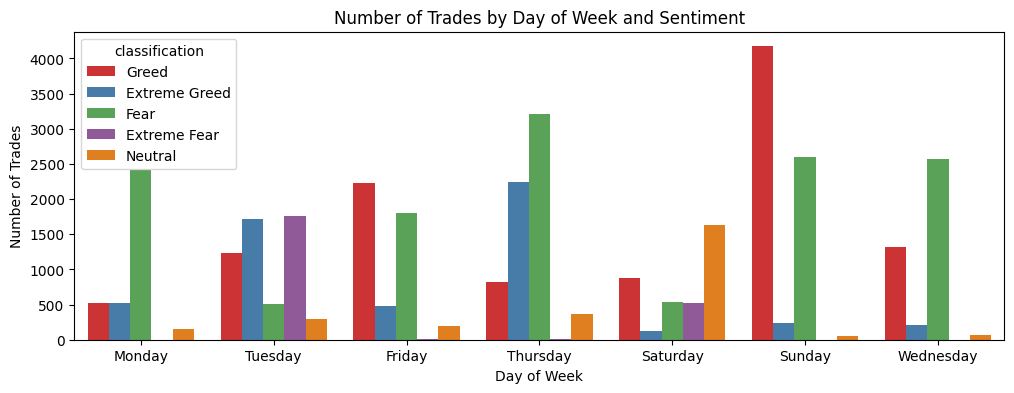

In [76]:
plt.figure(figsize=(12,4))
sns.countplot(data=merged_df, x='day_of_week',hue='classification',palette="Set1")
plt.title('Number of Trades by Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trades')
plt.show()


In [77]:
merged_df["side"]=merged_df["Side"].apply(lambda x:1 if x=="BUY" else 0)

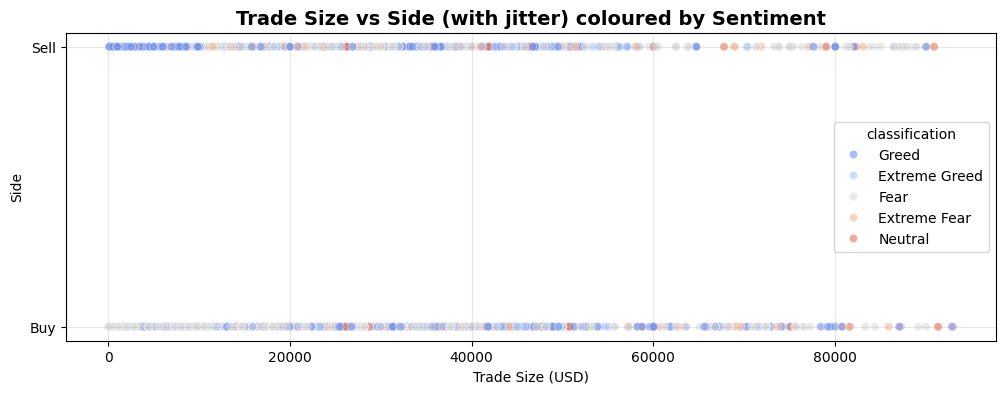

In [78]:
plt.figure(figsize=(12,4))
sns.scatterplot(
    data=merged_df,
    x='Size USD',
    y='Side',
    hue='classification',
    alpha=0.6,
    palette='coolwarm'
)
plt.yticks([0,1], ['Sell', 'Buy'])
plt.title('Trade Size vs Side (with jitter) coloured by Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Side')
plt.grid(True, alpha=0.3)
plt.show()


# ***SENTIMENT SHIFT ANALYSIS***

In [79]:

merged_df['trade_date'] = pd.to_datetime(merged_df['date_only'])

In [81]:
daily = merged_df.groupby('trade_date').agg(
    sentiment = ('classification', lambda x: x.mode()[0] if len(x.mode())>0 else None),
    avg_size_usd = ('Size USD', 'mean'),
    total_trades = ('Size USD', 'count'),
    win_rate = ('profit', 'mean')
).reset_index()


In [82]:
daily['prev_sentiment'] = daily['sentiment'].shift(1)

In [84]:
daily

,trade_date,sentiment,avg_size_usd,total_trades,win_rate,prev_sentiment
0,2023-01-05,Fear,159.000000,3,0.000000,None
1,2023-05-12,Neutral,5556.203333,9,0.000000,Fear
2,2024-01-01,Greed,14679.973889,18,0.055556,Neutral
3,2024-01-02,Greed,334.696667,6,0.000000,Greed
4,2024-01-03,Greed,3452.370073,137,0.934307,Greed
...,...,...,...,...,...,...
183,2025-11-04,None,4242.475939,1054,0.327324,None
184,2025-12-01,None,3521.579617,600,0.783333,None
185,2025-12-02,None,3671.615605,1024,0.463867,None
186,2025-12-03,None,3319.731594,3939,0.565372,None


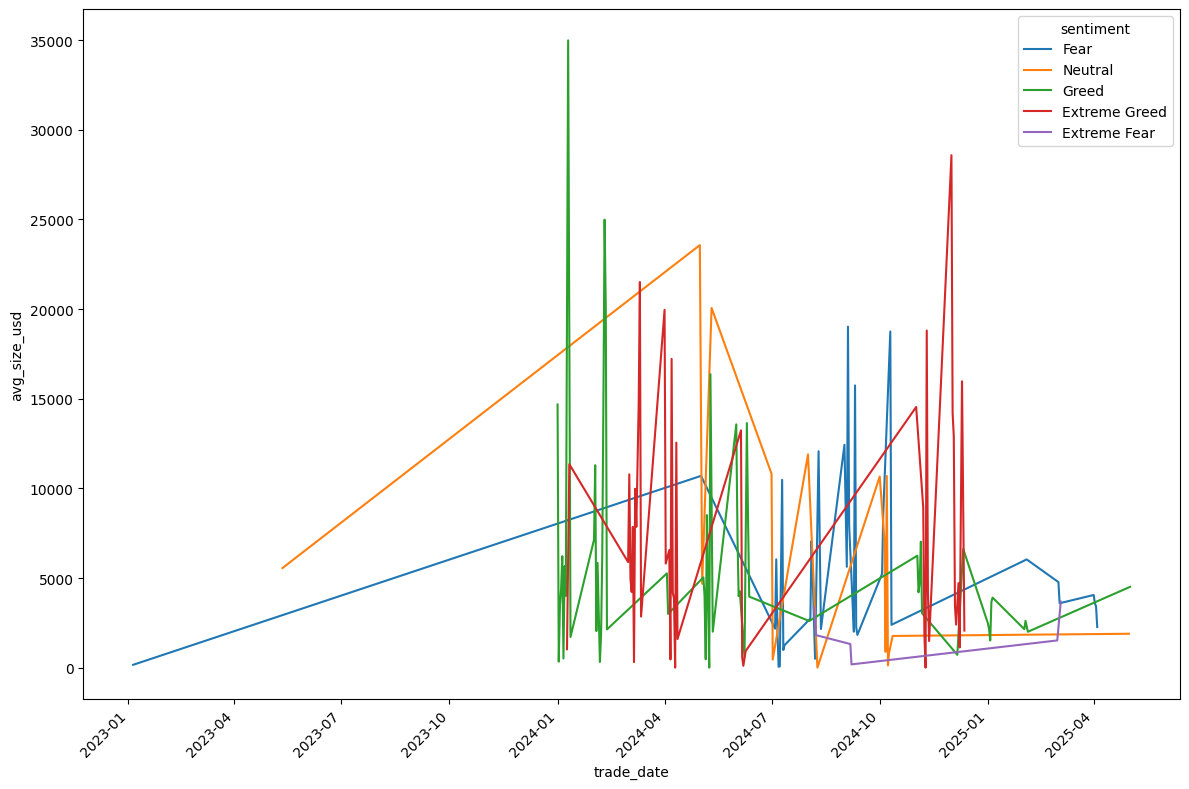

In [87]:

daily['sentiment_shift'] = (daily['sentiment'] != daily['prev_sentiment'])
plt.figure(figsize=(12,8))
sns.lineplot(data=daily, x='trade_date', y='avg_size_usd', hue='sentiment')
plt.xticks(rotation=45, ha='right')  # x-axis labels 45° angle par
plt.tight_layout()
plt.show()

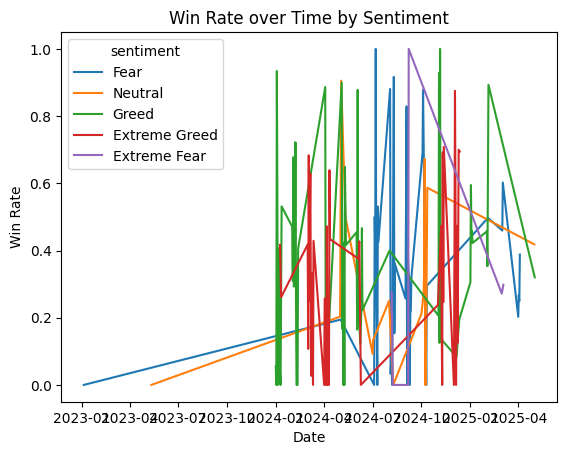

In [86]:
sns.lineplot(data=daily, x='trade_date', y='win_rate', hue='sentiment')
plt.title('Win Rate over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Win Rate')
plt.show()